# Abusive Email Classifier

#### Business Objective: 
- Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favoritism and hate in the gender or culture, in today's world so dominated by email no organization is immune to these hate emails.
- The goal of the project is to identify such emails on the given day based on the above inappropriate content.

#### Data Set Details:
- The dataset contains more than 2 lakh emails generated by employees of an organization.
- Data set details sent in csv file. 



# 1. Introduction
The project basically classifies text input based on context as abusive or non abusive. Email Classification includes a lot of preprocessing mostly and the modelling and training part in this problem is relatively simple. Our primary goal is to make a more generalised text classifier that is trained on an email dataset which is hand-labelled as abusive/non-abusive. However, while going through the EDA, we realise the significant flaws within this dataset. But we have used advanced feature extraction techniques to squeeze the maximum out our dataset. Our deep learning model; however merges two dataset and balances them which puts it at a huge advantage compared to our baseline machine learning models. Finally we will discuss on our deployment of the project. 

### 1.1 What we understood:
1. After a thorough research and comparing various research papers and works, we arrived at the following conclusions:
    - No model can ever be at par with human intelligence for abusive/profanity classification.
    - The word combinations in the language is simply infinite and people can get creative:
        - Eg1: “f4ck you” or “you b1tch”
        - Eg2: Are you willing to say that any sentence containing the word “suck” is abusive?
        - Eg3: “I want to stick my long-necked Giraffe up your fluffy white bunny.”
    - To train a model of this complexety, advanced deep learning technologies must be employed to work effectively against these contexts.

### 1.2 Ground Truth:
No matter how good we try to model this problem, people will always find a way to bypass the filter and we cannot counter the semantics at this scale. It would take time and huge computational resource to develop an AI that understands this.

# 2. Libraries

In [1]:
#Basic Libraries

import pandas as pd 
import numpy as np
import re
import numpy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For NLP & Preprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#Visualizations

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Setting Dark Theme
sns.set(rc={'figure.figsize':(10,6.18)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [4]:
#Machine Learning Libraries

#For Linear SVC
from sklearn.svm import LinearSVC
#For Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#For logistic Regression
from sklearn.linear_model import LogisticRegression
#For XGBoost Classifier
from xgboost import XGBClassifier
#For Perceptron
from sklearn.linear_model import Perceptron
#For Support Vector Machine
from sklearn.svm import SVC
#For ensemble Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#For model validation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#To generate model report
from sklearn.metrics import plot_confusion_matrix,classification_report

#To save the model
import joblib

In [ ]:
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.callbacks import EarlyStopping

In [38]:
# pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl 

In [ ]:
#Deep Learning Libraries - Pytorch BERT

# import torch
# import torch.nn as nn
# import transformers
# from transformers import AutoModel, BertTokenizerFast
# # specify GPU
# device = torch.device("cpu")

# 3. Exploratory Data Analysis
- Inititally we imported the dataset in Excel to get an overview. 
- There were some web-scraped mislabeled data in the excel sheet files.
- But as we imported it to Pandas, our dataset was correctly placed as per the index ignoring the mislabeled values.
- We took a data deep dive exploration to identify each and every point in the dataset
- Only two features- content & Class seem relevant to our problem statement.
- The rest of the features were discarded after a proper inspection.

### 3.1 Data Exploration Deep Dive

In [6]:
dataset = pd.read_csv("raw_data.csv")
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive


In [7]:
dataset.info() #No null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [8]:
dataset.describe()
#notice that there are atually 24k values only for content whereas the rest are duplicated

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,beck-s/all_documents/343.,<28156384.1075840359078.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


In [9]:
dataset.shape #There 48k records and 4 columns

(48076, 4)

In [10]:
dataset.columns

Index(['filename', 'Message-ID', 'content', 'Class'], dtype='object')

##### 3.1.1 Removing Unwanted features
After examining filename and Message-ID, we came to the conclusion that these two columns are not useful in our Modelling.
We will drop those columns

In [11]:
dataset.drop(['filename', 'Message-ID'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48076 non-null  object
 1   Class    48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB


##### 3.1.2 Duplicate value check
There are duplicate values in Content which is fundamental to our project. We will remove those duplicate values.

In [12]:
# No of unique values under every column
dataset.nunique() 
#There are clear number of duplicates in content which is fundamental in our project. We will remove it during preprocessing

content    24656
Class          2
dtype: int64

In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dataset.reset_index()
dataset.head()

,content,Class
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive


In [15]:
dataset.tail()

,content,Class
47974,Do you need new leads for your business ?\r\n...,Non Abusive
47975,[IMAGE]\r\n [IMAGE] [IMAGE] GARTH BROOKS ...,Non Abusive
47977,\r\n[IMAGE][IMAGE][IMAGE] \r\nDear SmartRemind...,Non Abusive
47980,\r\n[IMAGE]\r\n [IMAGE] [IMAGE] [IMAGE] ...,Non Abusive
47981,\r\nYou received this e-mail because you regis...,Non Abusive


##### 3.1.3 Null value check

In [16]:
#checking for Null Values
dataset.isna().sum()

content    0
Class      0
dtype: int64

In [17]:
dataset.dropna(inplace=True) #To remove the webscrapped from original csv file

In [18]:
#EDA Dataset
dataset.head()

,content,Class
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive


In [19]:
#EDA Dataset Shape
dataset.shape

(24656, 2)

### 3.2 Feature Analysis

In [20]:
dataset.rename({'content':'text','Class':'target'},axis=1,inplace=True) #Renaming for easier use
dataset.head()

,text,target
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive


##### 3.2.1 Target

In [21]:
#The column Class is our target. We wil check for its value counts
dataset.target.value_counts() 
#There is a critical bias within the dataset. We could try balancing after vectorization but it is not advised

Non Abusive    23014
Abusive         1642
Name: target, dtype: int64

In [22]:
#Percentage counts
dataset.target.value_counts(normalize=True) 

Non Abusive    0.933404
Abusive        0.066596
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

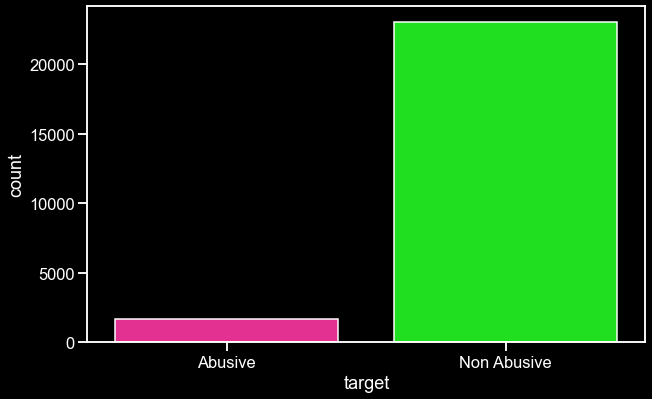

In [23]:
sns.countplot(dataset.target, palette=["deeppink","lime"])
#Biased Distribution of Target

### Managing the Imbalance:
- After we vectorize the text, we could resample the numerical values to balance the dataset. This would work well with any regression problems! However, it will not work well with NLP problems as in our case. There are numerous possibilities in language and randomly generating values for our problem will not help in anyway. It will just create a poor model with no balance between precision and recall
- We had experimented with a number of resampling techniques like SMOTE Tomek, Stratify Split, RandomUnderSampler which proved to futile during Modelling as we obtained very poor values.
- However, we will include them to prove our point.
- For our deep learning approach, we tried out a different approach which will be discussed later on. The deep learning model is practically very applicable to real world scenarios.

##### 3.2.2 Text

In [24]:
text_len=[len(x) for x in dataset.text]

In [25]:
outlier = [y for y in text_len if y > 1000]
len(outlier)

10227

In [26]:
dataset.length = dataset.text.apply(lambda x : len(x))

<AxesSubplot:xlabel='text', ylabel='Count'>

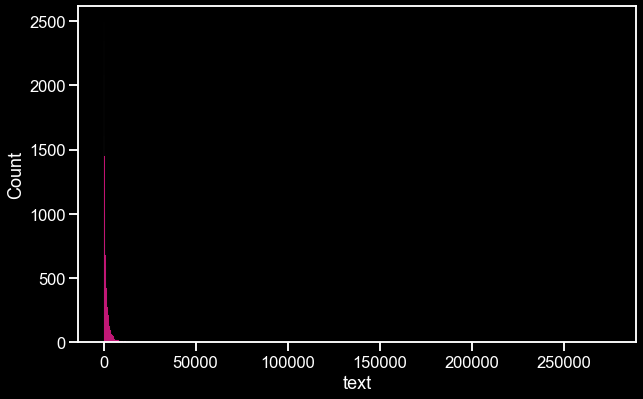

In [27]:
sns.histplot(dataset.length, color='deeppink')

There are huge outliers which we need to remove. We will remove the outliers after preprocessing

# 4. Preprocessing
- 4.1 Cleaning data 
    - There are a number of special characters and other values that needs to be removed. We will define a clean text function to remove it. 
    - This function will convert all text to lower case
    - We will add email headers ("from","to","subject","cc") to a custom stopword list and remove it.
- 4.2 Freq. of Words, Custom Stop Word Removal & Word Cloud
    - Freq. distribution of words will be viewed and certain useless words will be added to custom stop word list.
    - Word cloud before and after custom stopword removal will be viewed
- 4.3 Chat words abbrevation replacements
    - Short forms like IDK, WTF, ILU etc will be replaced with their abbrevations.
- 4.4 Removing records that exceed word limit 
    - If number of words exceed a certain characters, we will remove it.
- 4.5 Lemmatization

In [28]:
# Make a different Dataset
df = dataset.copy()
df.head()

,text,target
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive


### 4.1 Cleaning data

In [29]:
#Before cleaning
df.text.head()

0    eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...
1                                             fuck you
2    Gentlemen:\r\nThe following champagne is avail...
3    sorry i've taken so long...just been trying to...
4    asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...
Name: text, dtype: object

In [30]:
# Clean The Data using RegEx
#result = re.sub(pattern, replacement, string, count=0, flags=0)

def cleantext(text):
    text = re.sub(r"\n", " ", text) #remove next "\n"
    text = re.sub(r"[\d-]", "", text) #remove all digits 
    text = re.sub(r'[^A-Za-z0-9]+', " ", text) #remove all special charcters
    text = text.lower()
    return text

#Apply to our dataset
df.text = df.text.apply(cleantext)
df.text.head()

0    eat shit john j lavorato excelr pm to john arn...
1                                             fuck you
2    gentlemen the following champagne is available...
3    sorry i ve taken so long just been trying to f...
4    asshole john j lavorato excelr am to john arno...
Name: text, dtype: object

### 4.2 Freq. of Words, Custom Stop Word Removal & Word Cloud

In [31]:
#making a corpus of the dataset
review_str = ' '.join(df.text.tolist())

In [32]:
text = review_str
words = text.split()
fdsit1 = FreqDist(words)
print(fdsit1)
print(fdsit1.most_common(100))

#Words which are not in inbuilt stopwords are noted

<FreqDist with 108184 samples and 6333551 outcomes>
[('the', 230269), ('to', 170656), ('and', 111670), ('a', 103209), ('of', 91991), ('in', 72369), ('for', 66037), ('you', 64086), ('com', 63660), ('excelr', 63544), ('i', 56901), ('on', 52955), ('is', 52504), ('s', 48628), ('that', 44556), ('this', 42561), ('ect', 40014), ('from', 37682), ('be', 37124), ('with', 34705), ('will', 33845), ('td', 33107), ('at', 32503), ('we', 32498), ('have', 31411), ('it', 29349), ('are', 29148), ('http', 28947), ('your', 27508), ('as', 27094), ('font', 27039), ('or', 26525), ('by', 23643), ('if', 23138), ('not', 22117), ('hou', 20044), ('subject', 18520), ('am', 17701), ('pm', 17424), ('please', 17034), ('www', 16095), ('all', 16003), ('d', 15761), ('t', 15712), ('email', 15212), ('an', 14936), ('he', 14898), ('was', 14743), ('can', 14508), ('has', 13973), ('our', 13664), ('b', 13555), ('me', 13511), ('would', 12835), ('any', 12818), ('message', 12792), ('but', 12769), ('image', 12535), ('time', 12507), 

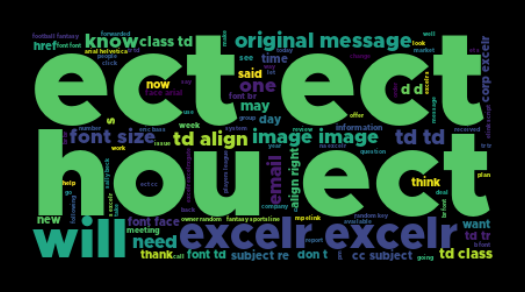

In [33]:
#Creating a WordCloud1
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [34]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("custom_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [35]:
# We can create a new stopwords list by mergeing WordCLoud's STOPWORDS and our custom_stop
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

768

In [36]:
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df.text

0        eat shit lavorato bets minn buff phil indi cin...
1                                                     fuck
2        gentlemen champagne approximate retail interes...
3        long fend chicks life sooooo hard monkey brian...
4        asshole lavorato gambling problem bills denver...
                               ...                        
47974    leads increased internet exposure thousands jo...
47975    garth brooks wrapped win tickets trip garth br...
47977    dear smartreminders member franchoice oneonone...
47980    kid rock forever official kid rock kidrock coc...
47981    registered trade web partners sites partner of...
Name: text, Length: 24656, dtype: object

In [37]:
#making a corpus of the dataset after custom stop word removal
review_str_2 = ' '.join(df.text.tolist())

In [38]:
#Checking Freq Distribution for new corpus
text = review_str_2
words = text.split()
fdsit2 = FreqDist(words)
print(fdsit2)
print(fdsit2.most_common(100))

<FreqDist with 107486 samples and 2538833 outcomes>
[('class', 7963), ('fantasy', 6138), ('arial', 4708), ('good', 4383), ('league', 4337), ('script', 3805), ('rick', 3618), ('helvetica', 3582), ('deal', 3511), ('elink', 3416), ('people', 3395), ('center', 3375), ('color', 3301), ('mark', 3224), ('number', 3155), ('start', 3141), ('great', 3106), ('order', 3012), ('change', 3008), ('offer', 2986), ('border', 2909), ('final', 2880), ('find', 2860), ('forward', 2781), ('give', 2764), ('bgcolor', 2752), ('fool', 2702), ('online', 2684), ('end', 2648), ('phtml', 2602), ('issues', 2600), ('working', 2587), ('description', 2586), ('stock', 2547), ('height', 2537), ('request', 2525), ('support', 2516), ('nyiso', 2515), ('made', 2503), ('play', 2456), ('plan', 2437), ('phone', 2427), ('provide', 2425), ('address', 2418), ('middle', 2416), ('src', 2338), ('details', 2330), ('img', 2305), ('view', 2300), ('visit', 2299), ('years', 2298), ('contract', 2284), ('top', 2261), ('blair', 2260), ('link

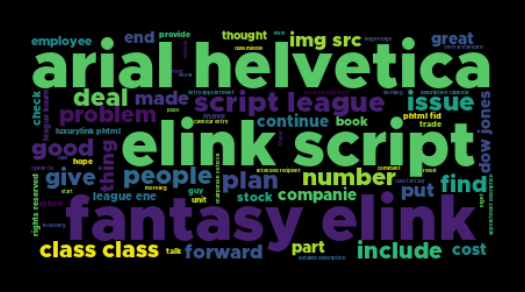

In [39]:
#Creating a WordCloud2
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str_2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()
#We have removed high frequency useless words from the dataset
#The words below are low frequency words

### 4.3 Chat words abbrevation replacements
Short form words will be removed from our dataset

In [40]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("chat_abbr.txt","r") as stop:
  chat_words = list(stop.read().split("\n"))

In [41]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words:
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df.text = df.text.apply(lambda text: chat_words_conversion(text))

### 4.4 Removing records that exceed word limit
- We have a large frequency of texts between 0 to 500 range. Rest of the texts are just outliers and do not add any value to our overall modelling. Email Texts with excessive words make it difficult due to large number of features.

In [42]:
df["length"] = df.text.apply(lambda x : len(x))

<AxesSubplot:xlabel='length', ylabel='Count'>

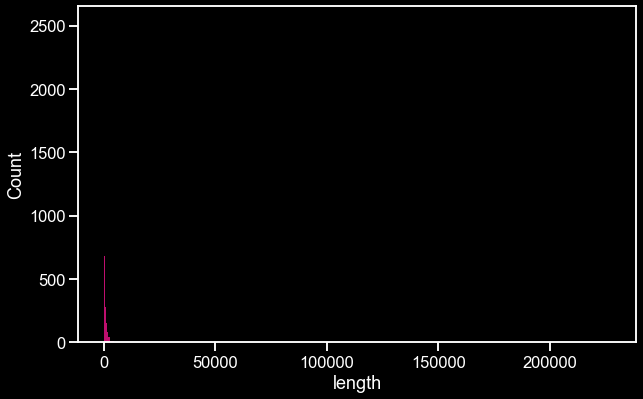

In [43]:
sns.histplot(df.length, color='deeppink') #huge outliers must be removed

In [44]:
df.target.loc[df.length>1500].value_counts() 
#We could remove these to ease the modelling process.
#There is dataleak here since we are loosing some of the data but we are gaining an advantage in modelling.
# We will drop these outliers

Non Abusive    2527
Abusive         231
Name: target, dtype: int64

In [45]:
df1 = df.loc[df.length<1500].copy() #Make a dataset copy
df1.head()

,text,target,length
0,eat shit lavorato bets minn buff phil indi cin...,Abusive,72
1,fuck,Abusive,4
2,gentlemen champagne approximate retail interes...,Abusive,369
3,long fend chicks life sooooo hard monkey brian...,Abusive,140
4,asshole lavorato gambling problem bills denver...,Abusive,51


<AxesSubplot:xlabel='length', ylabel='Count'>

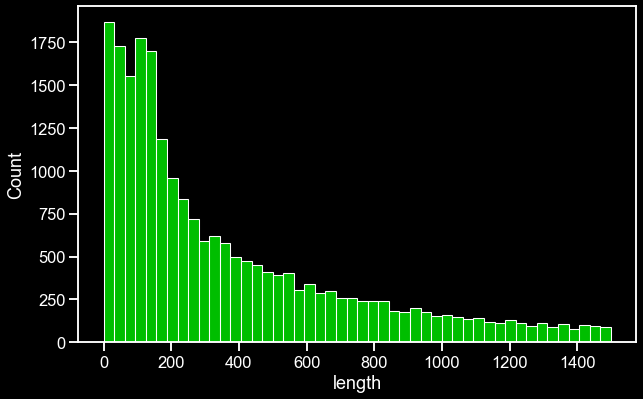

In [46]:
sns.histplot(df1.length, color='lime') #Outliers have been removed

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21896 entries, 0 to 47980
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21896 non-null  object
 1   target  21896 non-null  object
 2   length  21896 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 684.2+ KB


### 4.5 Lemmatization

In [48]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df1.text = df1.text.apply(lambda text: lemmatize_words(text))
df1.head()

,text,target,length
0,eat shit lavorato bet minn buff phil indi cinn...,Abusive,72
1,fuck,Abusive,4
2,gentleman champagne approximate retail interes...,Abusive,369
3,long fend chick life sooooo hard monkey brian ...,Abusive,140
4,asshole lavorato gambling problem bill denver ...,Abusive,51


# 5. Advanced Feature Analysis

### 5.1 Adding Sentiment Polarity & WordCount

In [49]:
sent_analyzer = SentimentIntensityAnalyzer()
#Function to retrieve sentiment polarity
def get_senti_class(review): 
    analysis = sent_analyzer.polarity_scores(review)
    return analysis["compound"]

In [50]:
df1['polarity'] = df1['text'].apply(lambda text: get_senti_class(text))

In [51]:
# Balancing the data

In [52]:
df1_Abusive = df1[df1.target=='Abusive']
df1_Abusive.shape

(1411, 4)

In [53]:
df1_NonAbusive = df1[df1.target=='Non Abusive']
df1_NonAbusive.shape

(20485, 4)

In [54]:
# Oversampling

In [55]:
df1_Abusive_Oversampled = df1_Abusive.sample(df1_NonAbusive.shape[0],replace = True)

In [56]:
df1_balanced1  = pd.concat([df1_Abusive_Oversampled,df1_NonAbusive])
df1_balanced1['target'].value_counts()

Abusive        20485
Non Abusive    20485
Name: target, dtype: int64

In [57]:
# Classifying target as 0 & 1 

In [58]:
df1_balanced1['class_1'] = df1_balanced1['target'].apply(lambda x : 1 if x=='Abusive'else 0 )

In [59]:
df1_balanced1.head()

,text,target,length,polarity,class_1
529,fx total fucking mess calgary thought problem ...,Abusive,162,0.2975,1
2284,university police smashed suspected terrorist ...,Abusive,319,-0.9705,1
1175,jennifer cutaia etelvina guerra jessica anaya ...,Abusive,923,0.4588,1
3312,alternative viagra spice sex life improve sex ...,Abusive,568,0.9810,1
549,thing trust adjusting easily thing quiet snowb...,Abusive,182,0.7906,1


In [60]:
df1_balanced1.tail()

,text,target,length,polarity,class_1
47973,cgoering nyiso writes nyiso tech exchange disc...,Non Abusive,236,0.0000,0
47974,lead increased internet exposure thousand join...,Non Abusive,660,0.9460,0
47975,garth brook wrapped win ticket trip garth broo...,Non Abusive,521,0.9517,0
47977,dear smartreminders member franchoice oneonone...,Non Abusive,435,0.8720,0
47980,kid rock forever official kid rock kidrock coc...,Non Abusive,438,-0.6597,0


In [61]:
df2 = df1_balanced1.copy()

In [62]:
df2.head()

,text,target,length,polarity,class_1
529,fx total fucking mess calgary thought problem ...,Abusive,162,0.2975,1
2284,university police smashed suspected terrorist ...,Abusive,319,-0.9705,1
1175,jennifer cutaia etelvina guerra jessica anaya ...,Abusive,923,0.4588,1
3312,alternative viagra spice sex life improve sex ...,Abusive,568,0.9810,1
549,thing trust adjusting easily thing quiet snowb...,Abusive,182,0.7906,1


In [63]:
df2['word_count'] = df2['text'].apply(lambda text: len(text.split()))
df2.head()

,text,target,length,polarity,class_1,word_count
529,fx total fucking mess calgary thought problem ...,Abusive,162,0.2975,1,26
2284,university police smashed suspected terrorist ...,Abusive,319,-0.9705,1,42
1175,jennifer cutaia etelvina guerra jessica anaya ...,Abusive,923,0.4588,1,135
3312,alternative viagra spice sex life improve sex ...,Abusive,568,0.9810,1,73
549,thing trust adjusting easily thing quiet snowb...,Abusive,182,0.7906,1,28


In [101]:
df2.tail()

,text,target,length,polarity,class_1,word_count
47973,cgoering nyiso writes nyiso tech exchange disc...,Non Abusive,236,0.0000,0,33
47974,lead increased internet exposure thousand join...,Non Abusive,660,0.9460,0,86
47975,garth brook wrapped win ticket trip garth broo...,Non Abusive,521,0.9517,0,76
47977,dear smartreminders member franchoice oneonone...,Non Abusive,435,0.8720,0,49
47980,kid rock forever official kid rock kidrock coc...,Non Abusive,438,-0.6597,0,68


### 5.2 Length, Polarity & WordCount Distributions

<AxesSubplot:xlabel='length', ylabel='Density'>

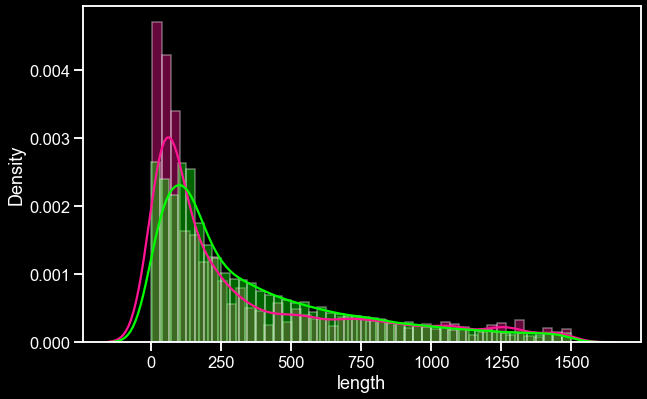

In [102]:
#Length Distribution Plot
sns.distplot(df2["length"].loc[df2.class_1==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["length"].loc[df2.class_1==0], hist=True,color='lime') #Non Abusive

<AxesSubplot:xlabel='polarity', ylabel='Density'>

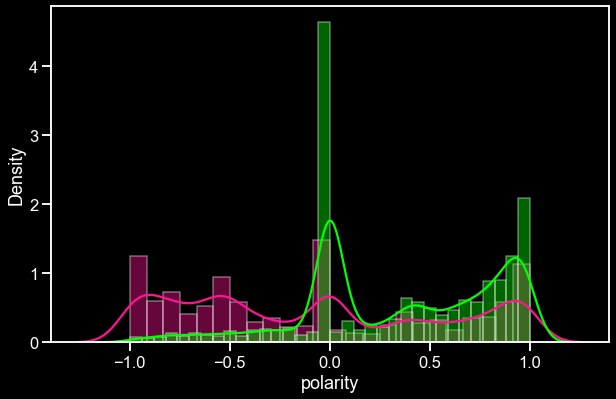

In [103]:
#Polarity Distribution Plot
sns.distplot(df2["polarity"].loc[df2.class_1==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["polarity"].loc[df2.class_1==0], hist=True,color='lime') #Non Abusive
#There are a large number of neutral statements
#It can be observed that the mean polarity of non_abusive emails is almost similar to the mean polarity of abusive emails. 
#Hence both the mean of absive and non_abusive emails shows 'neutral' polarity

<AxesSubplot:xlabel='word_count', ylabel='Density'>

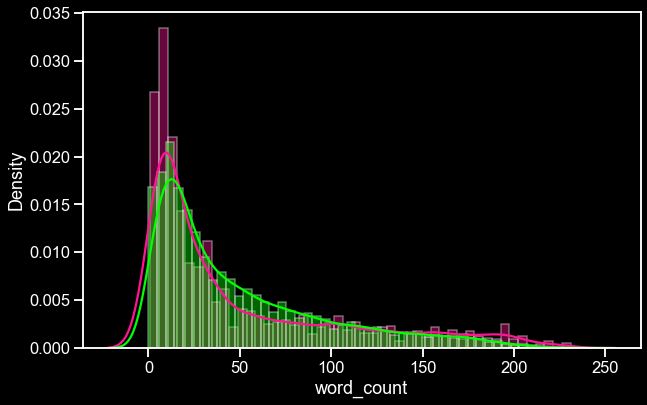

In [104]:
#WordCount Distribution Plot
sns.distplot(df2["word_count"].loc[df2.class_1==1], hist=True,color='deeppink')#Abusive
sns.distplot(df2["word_count"].loc[df2.class_1==0], hist=True,color='lime') #Non Abusive

# 6. Vectorization
### 6.1 CountVectorizer

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000)

X_count = cv.fit_transform(df2["text"])

In [106]:
 X_count.shape

(40970, 10000)

In [107]:
X_count

<40970x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1287208 stored elements in Compressed Sparse Row format>

In [109]:
y = df2.class_1

### 6.2 Stratified Train Test Split - Balancing the Data
- The stratified sampling is designed to equally distribute some features in the next train and test sets.
- https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi

In [110]:
# split into train test sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.30, random_state=1, stratify=y)
#We will vectorize train and test seperately to avoid mixing

### 6.3 TFIDF Transformer

In [111]:
#Transform To TFIDF Vector
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train_count)
X_test = tfidf_transformer.fit_transform(X_test_count)
print(X_train.shape)
print(X_test.shape)

(28679, 10000)
(12291, 10000)


# 7. Machine Learning Modelling
- We will try out different baseline machine Modelling approach and generate the classfication report for each of them.
- We will analyze and understand why such baseline models fail in the case of real world dataset.

### 7.1 Model Validation - Stratified K-Fold

In [112]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 

In [113]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

### 7.2 Baseline Models

#### 7.2.1 Logistic Regression

In [114]:
### Logisitic Regression

LR = LogisticRegression()

#Parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [300, 200, 100, 10]

#ParametersGrid
lr_param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#GridSearchCV
gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [300, 200, 100, 10], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

Best : 0.993793365507497, using {'C': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6145
           1       0.99      1.00      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



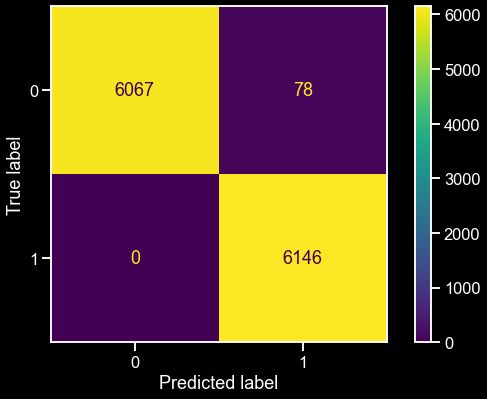

In [115]:
# Summarize the results
LR_best = gsLR.best_estimator_
print('Best : {}, using {}'.format(gsLR.best_score_,gsLR.best_params_))
report(gsLR)

In [116]:
# save the model to disk
# with open('/content/drive/MyDrive/Project/NLP_project/Deployment', 'wb') as filename:
#     joblib.dump(gsLR, filename)

#### 7.2.2 LinearSVC

In [117]:
# Train the model
LSVC = LinearSVC()

#Parameters
class_weight=[None]
dual=[True]
tol=[1e-3,1e-2]
max_iter=[1e5]

#ParametersGrid
lsvc_param_grid = dict(class_weight=class_weight,dual=dual,tol=tol,max_iter=max_iter)

#GridSearchCV
gsLSVC = GridSearchCV(LSVC,param_grid = lsvc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsLSVC.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'class_weight': [None], 'dual': [True],
                         'max_iter': [100000.0], 'tol': [0.001, 0.01]},
             scoring='accuracy', verbose=1)

Best : 0.9934446722333077, using {'class_weight': None, 'dual': True, 'max_iter': 100000.0, 'tol': 0.001}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6145
           1       0.99      1.00      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



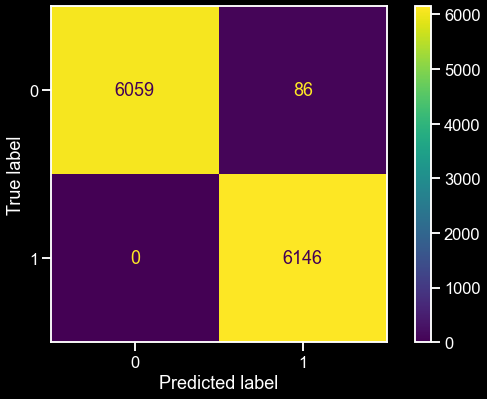

In [118]:
#Summarize the results
LSVC_best = gsLSVC.best_estimator_
print('Best : {}, using {}'.format(gsLSVC.best_score_,gsLSVC.best_params_))
report(gsLSVC)

In [119]:
# save the model to disk
# with open('deployment/ml_models/2gsLSVC.sav', 'wb') as filename:
#     joblib.dump(gsLSVC, filename)

#### 7.2.3 Multinomial Naive Bayes Classification

In [120]:
# Train the model
MNB = MultinomialNB()

#Parameters
alpha=[1.0]
fit_prior=[True]

#ParametersGrid
mnb_param_grid = dict(alpha=alpha,fit_prior=fit_prior)

#GridSearchCV
gsMNB = GridSearchCV(MNB,param_grid = mnb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsMNB.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1.0], 'fit_prior': [True]},
             scoring='accuracy', verbose=1)

Best : 0.9473830403490278, using {'alpha': 1.0, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6145
           1       0.93      0.96      0.95      6146

    accuracy                           0.95     12291
   macro avg       0.95      0.95      0.95     12291
weighted avg       0.95      0.95      0.95     12291



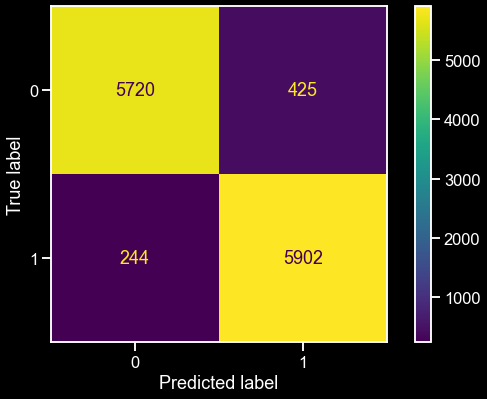

In [121]:
#Summarize the results
MNB_best = gsMNB.best_estimator_
print('Best : {}, using {}'.format(gsMNB.best_score_,gsMNB.best_params_))
report(gsMNB)
#Very poor recall values for 1

In [122]:
# save the model to disk
# with open('deployment/ml_models/3gsMNB.sav', 'wb') as filename:
#     joblib.dump(gsMNB, filename)

#### 7.2.4 RandomForest

In [123]:
# Train the model
RFC = RandomForestClassifier()


#Parameters
rf_param_grid = {"max_depth": [15,20],
              "bootstrap": [False],
              "n_estimators" :[30,40,50],
              "criterion": ["gini"]}

#GridSearchCV
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [15, 20], 'n_estimators': [30, 40, 50]},
             scoring='accuracy', verbose=1)

Best : 0.9045290728709545, using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 40}
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      6145
           1       0.83      0.99      0.90      6146

    accuracy                           0.89     12291
   macro avg       0.91      0.89      0.89     12291
weighted avg       0.91      0.89      0.89     12291



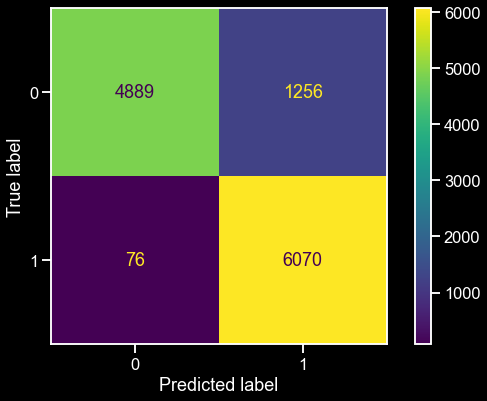

In [124]:
# Summarize the results
RFC_best = gsRFC.best_estimator_
print('Best : {}, using {}'.format(gsRFC.best_score_,gsRFC.best_params_))
report(gsRFC)
#Extremely Poor Recall values for 1

In [125]:
# save the model to disk
# with open('deployment/ml_models/4gsRFC.sav', 'wb') as filename:
#     joblib.dump(gsRFC, filename)

#### 7.2.5 XGBooster

In [126]:
#Train the model
XGB = XGBClassifier()

#ParamGridSearch
xgb_param_grid = {"learning_rate"    : [0.075,0.1,0.2] ,
                  "max_depth"        : [17],
                  "gamma"            : [ 0.01]}

gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[12:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

Best : 0.9895044984247306, using {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 17}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6145
           1       0.99      0.98      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



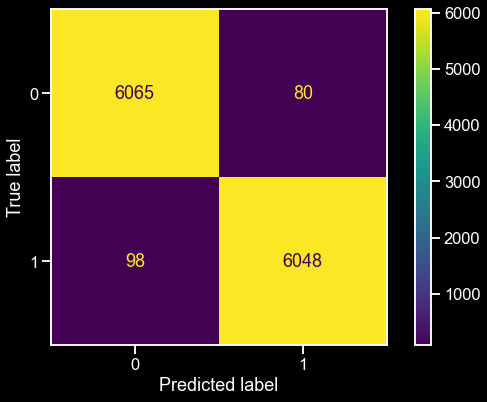

In [127]:
# Summarize the results
XGB_Best = gsXGB.best_estimator_
print('Best : {}, using {}'.format(gsXGB.best_score_,gsXGB.best_params_))
report(gsXGB)
#Average Recall values for 1

In [128]:
# save the model to disk
# with open('deployment/ml_models/5gsXGB.sav', 'wb') as filename:
#     joblib.dump(gsXGB, filename)

#### 7.2.6 Perceptron

In [129]:
# Train the model
PPT = Perceptron()


#Parameters
ppt_param_grid = {"tol": [1e-5,1e-6],
              "class_weight": [None],
                  "early_stopping":[False]
                 }

#GridSearchCV
gsPPT = GridSearchCV(PPT,param_grid = ppt_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsPPT.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Perceptron(), n_jobs=-1,
             param_grid={'class_weight': [None], 'early_stopping': [False],
                         'tol': [1e-05, 1e-06]},
             scoring='accuracy', verbose=1)

Best : 0.9933749250667863, using {'class_weight': None, 'early_stopping': False, 'tol': 1e-06}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6145
           1       0.99      1.00      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



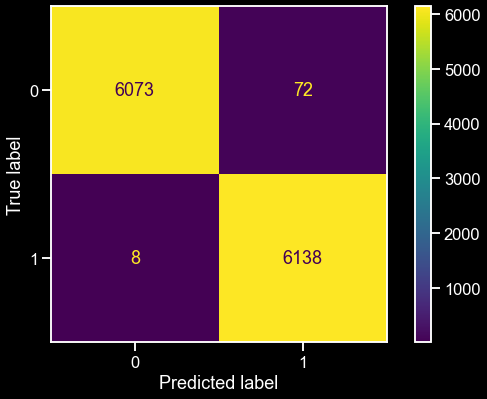

In [130]:
# Summarize the results
PPT_best = gsPPT.best_estimator_
print('Best : {}, using {}'.format(gsPPT.best_score_,gsPPT.best_params_))
report(gsPPT)
#Maybe an over fitted model. But average precison and recall for 1

In [131]:
# save the model to disk
# with open('deployment/ml_models/6gsPPT.sav', 'wb') as filename:
#     joblib.dump(gsPPT, filename)

#### 7.2.7 Support Vector Machine

In [132]:
# Train the model
SVMC = SVC(probability=True)

# #Parameters
svc_param_grid = {'kernel': ['linear']}
#GridSearchCV
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVMC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'kernel': ['linear']}, scoring='accuracy', verbose=1)

Best : 0.9936189975911937, using {'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6145
           1       0.99      1.00      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



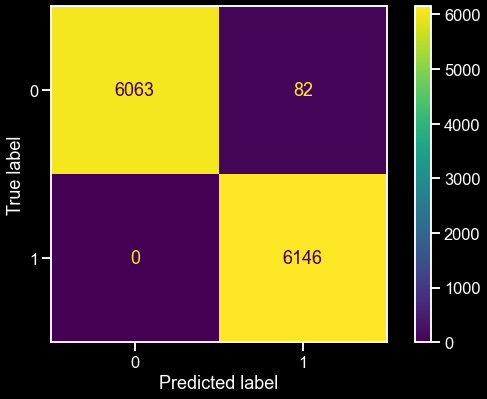

In [133]:
# Summarize the results
SVMC_best = gsSVMC.best_estimator_
print('Best : {}, using {}'.format(gsSVMC.best_score_,gsSVMC.best_params_))
report(gsSVMC)
#Good but a little low precision for 1

In [134]:
# save the model to disk
# with open('deployment/ml_models/7gsSVMC.sav', 'wb') as filename:
#     joblib.dump(gsSVMC, filename)

### 7.3 Plotting Learning Curves
- Clearly visualize overfitting effect on the training set and the effect of the training size on the accuracy.
- We will choose ensemble models from the ones which generalise very well.

#### 7.2.1 Learning Curve function

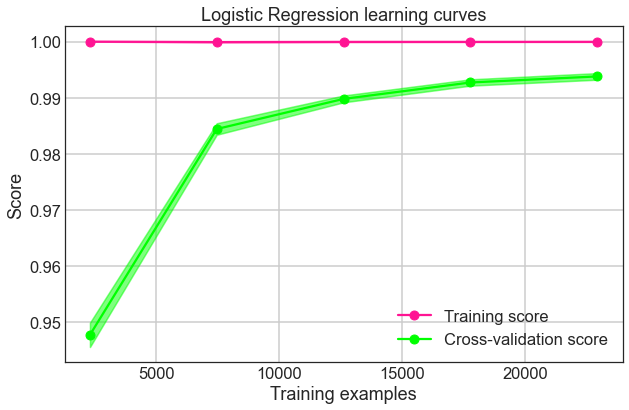

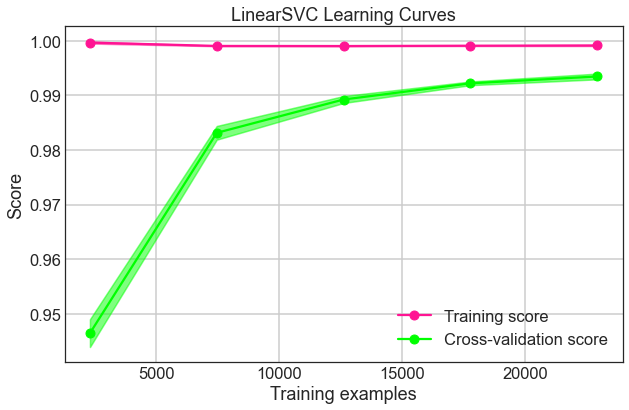

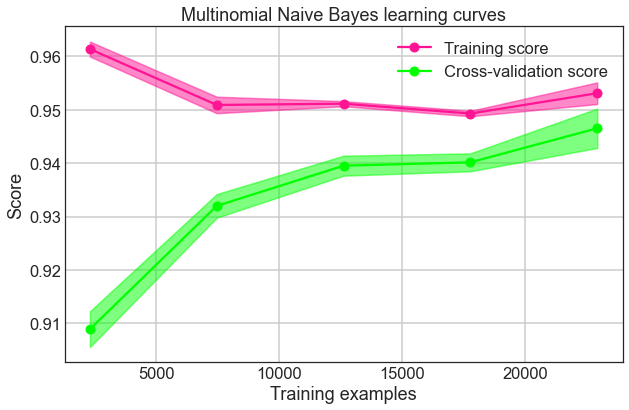

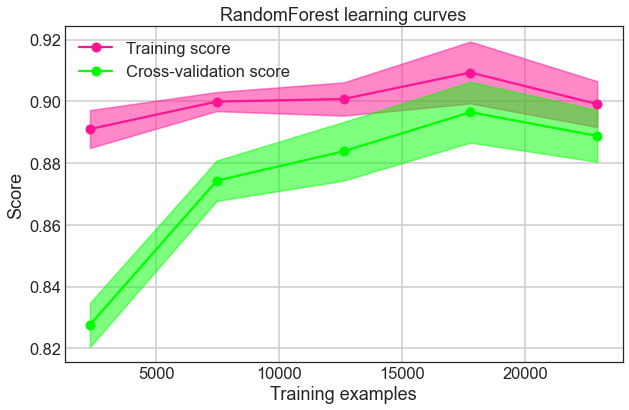

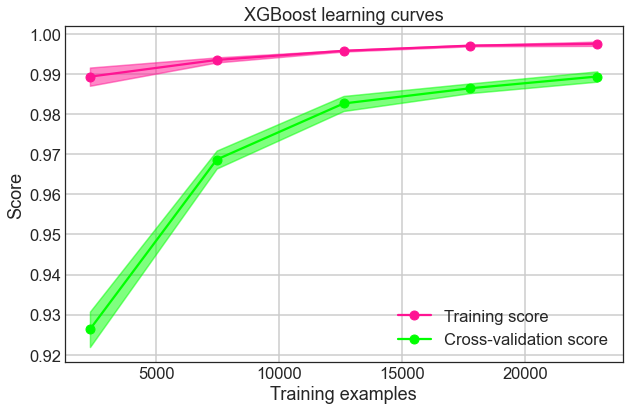

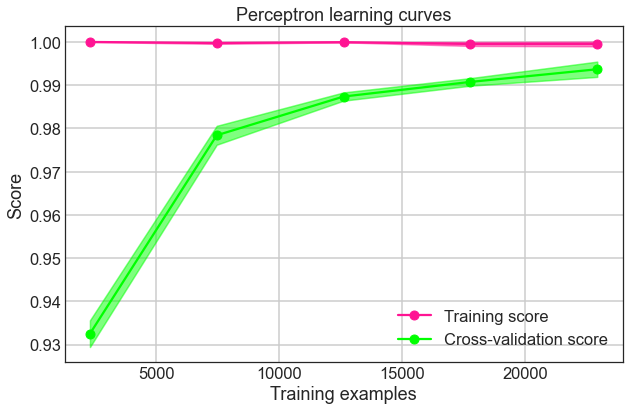

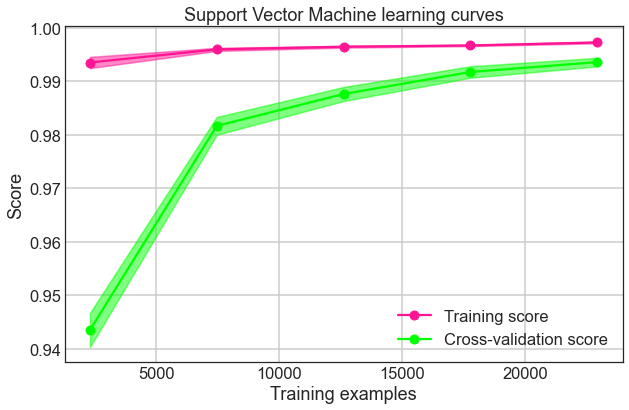

In [135]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
        #Setting White Theme
    sns.set(rc={'figure.figsize':(10,6.18)})
    sns.set(style="ticks", context="talk")
    plt.style.use("seaborn-white")
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.5,
                     color="deeppink")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.5, color="lime")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="deeppink",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="lime",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsLSVC.best_estimator_,"LinearSVC Learning Curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsMNB.best_estimator_,"Multinomial Naive Bayes learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsRFC.best_estimator_,"RandomForest learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsXGB.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsPPT.best_estimator_,"Perceptron learning curves",X_train,y_train,cv=kfold)

g = plot_learning_curve(gsSVMC.best_estimator_,"Support Vector Machine learning curves",X_train,y_train,cv=kfold)


#### 7.2.2 Inferences
- Logistic Regression and LinearSVC both are highly overfitted models with no generalization.
- Multinomial Naive Bayes have a fair level of Generalization. But it is constant as seen in the curve.
- RandomForest and XGBoost are greedy models and hence, overfitted models.
- Perceptron has good level of generalization which is constant as well.
- Support Vector also have some level of generalization but not as good as expected.

### 7.4 Ensemble Models

In [136]:
votingC = VotingClassifier(estimators=[('lr',LR_best),('xgb',XGB_Best),('rfc', RFC_best),('mnb', MNB_best),('lsvc',LSVC_best),('ppt',PPT_best),('svm',SVMC_best)], voting='hard', n_jobs=-1)
votingC = votingC.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6145
           1       0.99      1.00      0.99      6146

    accuracy                           0.99     12291
   macro avg       0.99      0.99      0.99     12291
weighted avg       0.99      0.99      0.99     12291



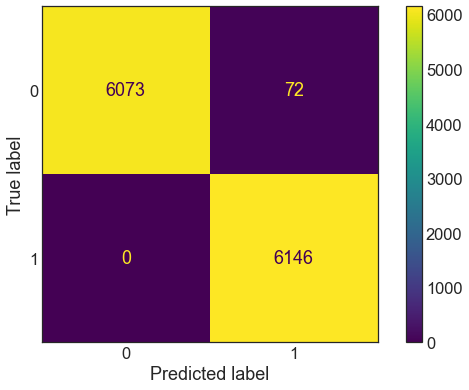

In [137]:
report(votingC) #POOR Recall for 1 and model seems overfitted

In [138]:
# save the model to disk
# with open('deployment/ml_models/8Ensemble.sav', 'wb') as filename:
#     joblib.dump(votingC, filename)

### 7.5 Problems with ML Models

- All these baseline approaches are excellent in the case of numerical problems. 
- However, Language cannot be considered numerically in this approach because the same text can have many interpretations.
- Unlike normal classfication problems where we can correct the imbalance via SMOTE or Undersampler, the same cannot be applied in the case of NLP. Duplicating or resampling values does not help much in NLP. The semantics and their meaning needs to be considered which is not suitable in the case ML approach.
- These tree-based models are GREEDY models. They just simply try to get the best accuracy without understanding the semantics in the case of NLP.
- While testing the models on realworld data, we came to the conclusion that for real world input emails, our base line approach is no good. Thats why we will consider Deep Learning Methodologies.

# 8. Why Deep Learning?
- Deep learning models and the word embedding techniques take the semantics into consideration. We will be able to know the difference between the same words in different sentences. 
      I have an ant bite on my arm.
      It’s important to arm yourself with a solid education.
- In the above case, word2vec have hard coded same meaning. But BERT and TensorFow Embedding take semantics into consideration and provide great results during modelling. 
- Deep learning models are very accurate in predicting our requirement in this project.

# 9. Deep Learning Modelling
### 9.1 RNN with bidirectional LSTM 
- This model will be built with the original dataset. There are a number of parameters that need to be considered in this case.
- Tensorflow librarires are quite light weight as compared to pytorch model.

#### 9.1 Building and Training the Model

In [65]:
# Defining pre-processing hyperparameters
max_len = 100
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 8000

In [66]:
# Split data into train and test
train_mail1, test_mail1, train_class1, test_class1 = train_test_split(df2['text'], df2['class_1'], test_size=0.2, random_state=434)

In [70]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_mail1)

In [72]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'final': 2,
 'fool': 3,
 'trans': 4,
 'good': 5,
 'woman': 6,
 'found': 7,
 'detail': 8,
 'number': 9,
 'man': 10,
 'cd': 11,
 'deal': 12,
 'give': 13,
 'load': 14,
 'cut': 15,
 'people': 16,
 'as': 17,
 'working': 18,
 'variance': 19,
 'quantity': 20,
 'year': 21,
 'sell': 22,
 'love': 23,
 'thing': 24,
 'folder': 25,
 'shit': 26,
 'order': 27,
 'night': 28,
 'mkt': 29,
 'hope': 30,
 'delivery': 31,
 'preferred': 32,
 'guy': 33,
 'rick': 34,
 'bitch': 35,
 'big': 36,
 'pear': 37,
 'find': 38,
 'offer': 39,
 'synchronizing': 40,
 'thought': 41,
 'change': 42,
 'issue': 43,
 'amazon': 44,
 'great': 45,
 'phone': 46,
 'men': 47,
 'description': 48,
 'plan': 49,
 'feel': 50,
 'life': 51,
 'zone': 52,
 'mom': 53,
 'mark': 54,
 'forward': 55,
 'capacity': 56,
 'request': 57,
 'problem': 58,
 'trade': 59,
 'address': 60,
 'contract': 61,
 'dick': 62,
 'transaction': 63,
 'link': 64,
 'item': 65,
 'weekend': 66,
 'start': 67,
 'friend': 68,
 'morning': 69,
 'employee': 70,
 'put

In [73]:
# check how many unique tokens are present
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 45519 unique tokens in training data. 


In [74]:
# Sequencing and padding 
#train
training_sequences = tokenizer.texts_to_sequences(train_mail1)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

#test
testing_sequences = tokenizer.texts_to_sequences(test_mail1)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [75]:
vocab_size = 8000 
embeding_dim = 16
drop_value = 0.2 
n_dense = 24

In [76]:
#Dense Sequential model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           128000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 128,433
Trainable params: 128,433
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [79]:
# fit dense seq model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_class1, epochs=num_epochs, validation_data=(testing_padded, test_class1),callbacks =[early_stop], verbose=2)

Epoch 1/30
1025/1025 - 5s - loss: 0.3326 - accuracy: 0.8810 - val_loss: 0.1128 - val_accuracy: 0.9783
Epoch 2/30
1025/1025 - 3s - loss: 0.0697 - accuracy: 0.9840 - val_loss: 0.0456 - val_accuracy: 0.9927
Epoch 3/30
1025/1025 - 3s - loss: 0.0268 - accuracy: 0.9949 - val_loss: 0.0296 - val_accuracy: 0.9948
Epoch 4/30
1025/1025 - 3s - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.0219 - val_accuracy: 0.9963
Epoch 5/30
1025/1025 - 3s - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0268 - val_accuracy: 0.9945
Epoch 6/30
1025/1025 - 3s - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9962
Epoch 7/30
1025/1025 - 3s - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0324 - val_accuracy: 0.9949


In [80]:
# Model performance on test data 
model.evaluate(testing_padded, test_class1)

257/257 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9949


[0.03244992345571518, 0.9948742985725403]

In [ ]:
# Plotting loss and accuracy Vs number of epochs

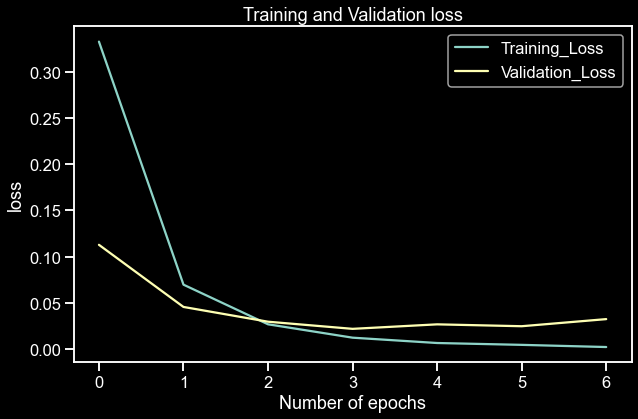

In [81]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

#### 9.2  LSTM  Modelling

In [82]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

In [83]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [86]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [85]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_class1, epochs=num_epochs, validation_data=(testing_padded, test_class1),callbacks =[early_stop], verbose=2)

Epoch 1/30
1025/1025 - 108s - loss: 0.2183 - accuracy: 0.9157 - val_loss: 0.0925 - val_accuracy: 0.9699
Epoch 2/30
1025/1025 - 100s - loss: 0.0620 - accuracy: 0.9793 - val_loss: 0.0566 - val_accuracy: 0.9808
Epoch 3/30
1025/1025 - 101s - loss: 0.0408 - accuracy: 0.9857 - val_loss: 0.0476 - val_accuracy: 0.9838
Epoch 4/30
1025/1025 - 101s - loss: 0.0340 - accuracy: 0.9882 - val_loss: 0.0404 - val_accuracy: 0.9864
Epoch 5/30
1025/1025 - 102s - loss: 0.0381 - accuracy: 0.9874 - val_loss: 0.0663 - val_accuracy: 0.9787
Epoch 6/30
1025/1025 - 106s - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0555 - val_accuracy: 0.9841


In [ ]:
# Plotting loss and accuracy Vs number of epochs

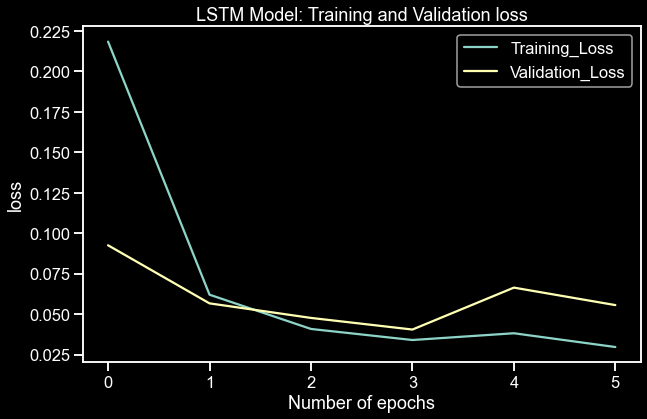

In [87]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

#### 9.4 LSTM Modelling - Bidirectional

In [88]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [89]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [90]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_class1, epochs=num_epochs, 
                    validation_data=(testing_padded, test_class1),callbacks =[early_stop], verbose=2)

Epoch 1/30
1025/1025 - 71s - loss: 0.2342 - accuracy: 0.9100 - val_loss: 0.1812 - val_accuracy: 0.9435
Epoch 2/30
1025/1025 - 66s - loss: 0.0776 - accuracy: 0.9813 - val_loss: 0.0577 - val_accuracy: 0.9866
Epoch 3/30
1025/1025 - 66s - loss: 0.0300 - accuracy: 0.9943 - val_loss: 0.0360 - val_accuracy: 0.9934
Epoch 4/30
1025/1025 - 65s - loss: 0.0267 - accuracy: 0.9952 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 5/30
1025/1025 - 66s - loss: 0.0601 - accuracy: 0.9854 - val_loss: 0.0699 - val_accuracy: 0.9828
Epoch 6/30
1025/1025 - 66s - loss: 0.0155 - accuracy: 0.9974 - val_loss: 0.0336 - val_accuracy: 0.9933
Epoch 7/30
1025/1025 - 64s - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0393 - val_accuracy: 0.9931
Epoch 8/30
1025/1025 - 65s - loss: 0.0148 - accuracy: 0.9972 - val_loss: 0.1397 - val_accuracy: 0.9614


In [ ]:
# Plotting loss and accuracy Vs number of epochs

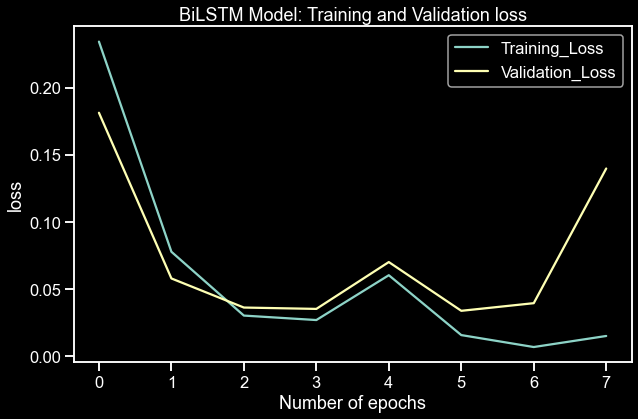

In [91]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
# comparing the results & choosing best model

In [92]:
# Comparing three different models
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_class1)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_class1)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_class1)} " )

257/257 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9949
Dense architecture loss and accuracy: [0.03244992345571518, 0.9948742985725403] 
257/257 [==============================] - 7s 21ms/step - loss: 0.0555 - accuracy: 0.9841 0s - loss: 0.0557 - 
LSTM architecture loss and accuracy: [0.055528923869132996, 0.9841223955154419] 
257/257 [==============================] - 4s 14ms/step - loss: 0.1397 - accuracy: 0.9614
Bi-LSTM architecture loss and accuracy: [0.13966068625450134, 0.961430013179779] 


In [ ]:
# Among the three models dense sequential classifer network model outperforms both LSTM and BiLSTM.hence selecting the dense sequential classifier network model as the final model from deeplearning.

#### 9.5 Testing on Real Data

In [ ]:
# sample 1 : Please fuck offf you ugly dumfucker
# sample 2 : On a dark desert highway, cool wind in my hair Warm smell of colitas, rising up through the airUp ahead in the distance, I saw a shimmering lightMy head grew heavy and my sight grew dimhad to stop for the nightThere she stood in the doorway;I heard the mission bellAnd I was thinking to myself,This could be Heaven or this could be Hell .Then she lit up a candle and she showed me the way.There were voices down the corridor,I thought I heard them say


In [119]:
predict_mail = ["Please fuck offf you ugly dumfucker",
          "On a dark desert highway, cool wind in my hair Warm smell of colitas, rising up through the airUp ahead in the distance, I saw a shimmering light My head grew heavy and my sight grew dimhad to stop for the night.There she stood in the doorway;I heard the mission bell And I was thinking to myself,This could be Heaven or this could be Hell. Then she lit up a candle and she showed me the way.There were voices down the corridor,I thought I heard them say."]
# Defining prediction function
def predict_Abusive(predict_mail):
    new_seq = tokenizer.texts_to_sequences(predict_mail)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_Abusive(predict_mail)

array([[9.9996370e-01],
       [4.7649623e-06]], dtype=float32)

# 10. Conclusion:
- After trying out various feature engineering techniques and advanced modelling techniques, we understood that all these baseline approaches are poor predictors in any NLP problem. 
- When it comes to NLP, semantics must be considered and that should be a primary requirement. 
- Recall values are fundamental to modelling in NLP as we need to be careful when predicting a statement. Our prediction may have adverse effects on the user. Therefore, We understood that nlp models must have good recall in real world data.
- The deep learning models which we trained come at the cost of time and computational resourse. But the end resuls far outweight it's troubles. 
- We will consider all models for deployment. The deployment will be coded via streamlit and shared using heroku.

# 11. References:
We have reffered the following articles and tutorials during the duration of this project.
1. https://link.springer.com/article/10.1007/s41060-017-0088-4
2. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0243300
3. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
4. https://stackoverflow.com/questions/44003497/large-memory-usage-of-scipy-sparse-csr-matrix-toarray
5. https://machinelearningmastery.com/best-practices-document-classification-deep-learning/
6. https://towardsdatascience.com/deep-learning-techniques-for-text-classification-78d9dc40bf7c
7. https://github.com/prateekjoshi565/Fine-Tuning-BERT
8. https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270